## Simple fire spread simulation using LANDLAB

In [11]:
# pip install landlab

import numpy as np
import matplotlib.pyplot as plt
from landlab import RasterModelGrid

In [12]:
# Set up a simple model grid
grid = RasterModelGrid((100, 100), xy_spacing=10)

In [13]:
# Create a topography (flat)
elevation = np.zeros(grid.number_of_nodes)
grid.add_field('topographic__elevation', elevation, at='node')

array([0., 0., 0., ..., 0., 0., 0.], shape=(10000,))

In [14]:
# Set up fuel load (0 to 1)
np.random.seed(42)
fuel = np.random.uniform(0.5, 1.0, size=grid.number_of_nodes)
grid.add_field('fuel__mass', fuel, at='node')

array([0.68727006, 0.97535715, 0.86599697, ..., 0.97335396, 0.698744  ,
       0.6085702 ], shape=(10000,))

In [15]:
# Initialize fire status: 0 = unburned, 1 = burning, 2 = burned
fire_status = np.zeros(grid.number_of_nodes, dtype=int)

In [16]:
# Set initial fire ignition points
row, col = 50, 50  # middle of the grid
ignition_node = row * grid.shape[1] + col  # 💥 MANUAL calculation
fire_status[ignition_node] = 1
grid.add_field('fire__status', fire_status, at='node')

array([0, 0, 0, ..., 0, 0, 0], shape=(10000,))

In [17]:
# Wind influence (optional: you can tweak this)
wind_bias = np.array([0.7, 1.0, 0.7, 0.5])  # N, E, S, W wind favoring East

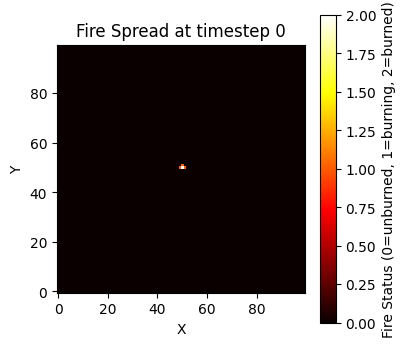

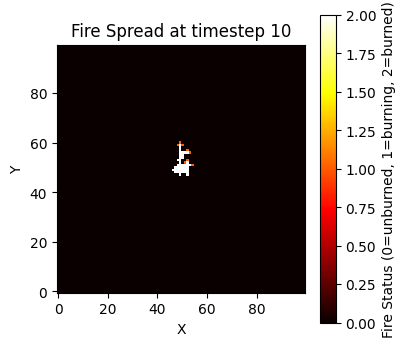

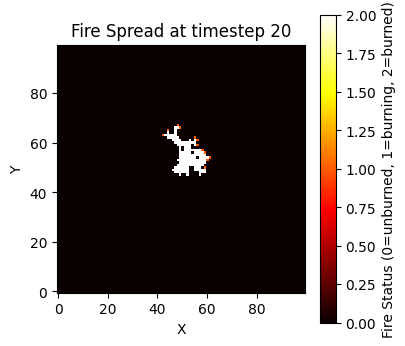

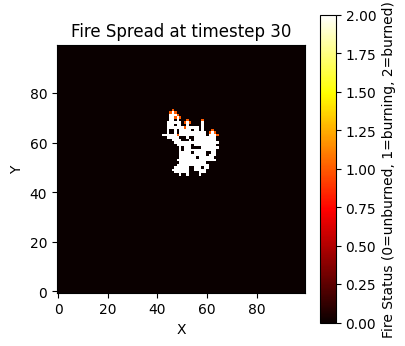

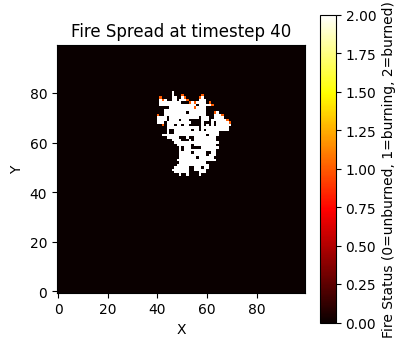

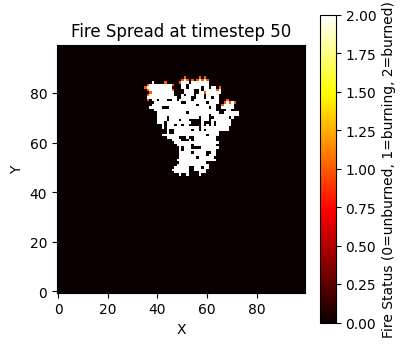

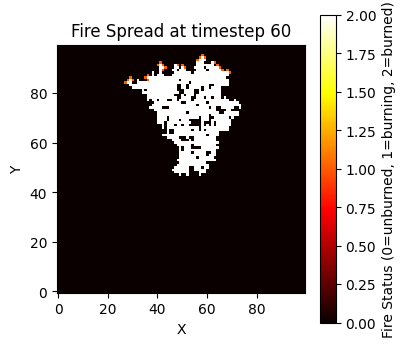

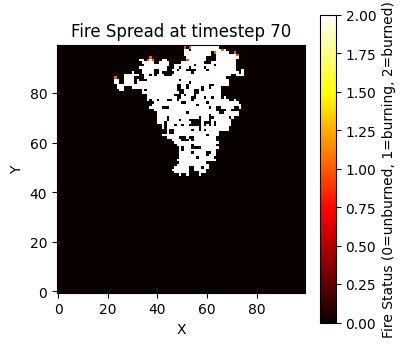

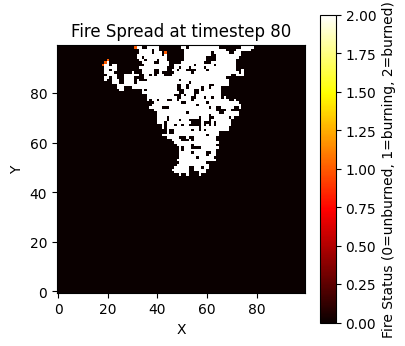

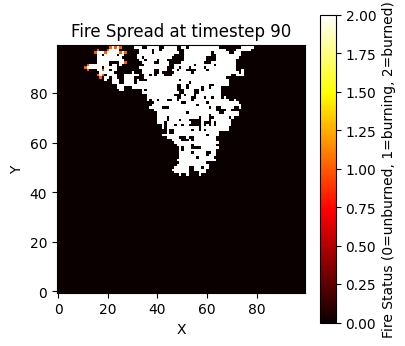

In [18]:
# Simulation
timesteps = 100
for step in range(timesteps):
    # Copy current status
    current_status = grid.at_node['fire__status'].copy()
    burning_nodes = np.where(current_status == 1)[0]

    for node in burning_nodes:
        neighbors = grid.active_adjacent_nodes_at_node[node]
        for i, nbr in enumerate(neighbors):
            if nbr != -1 and current_status[nbr] == 0:
                # Spread fire based on fuel and wind
                spread_chance = 0.9 * wind_bias[i % 4] * grid.at_node['fuel__mass'][nbr]
                if np.random.rand() < spread_chance:
                    grid.at_node['fire__status'][nbr] = 1

        # Mark node as burned
        grid.at_node['fire__status'][node] = 2

    # Visualization every 5 steps
    if step % 10 == 0:
        plt.figure(figsize=(4, 4))
        plt.title(f"Fire Spread at timestep {step}")
        plt.imshow(grid.at_node['fire__status'].reshape(grid.shape), origin='lower', cmap='hot', interpolation='nearest')
        plt.colorbar(label='Fire Status (0=unburned, 1=burning, 2=burned)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

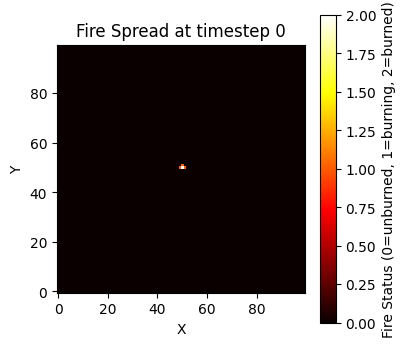

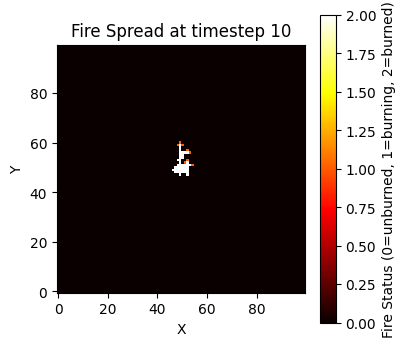

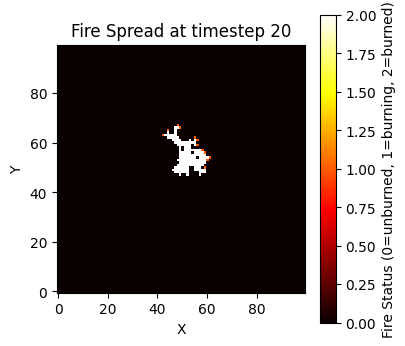

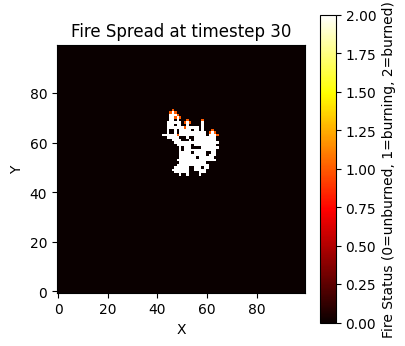

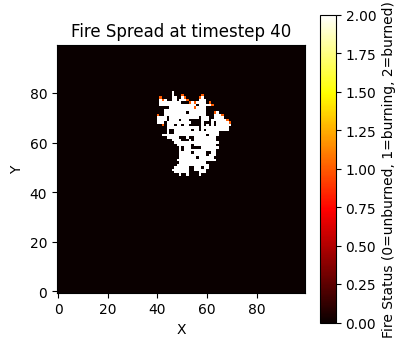

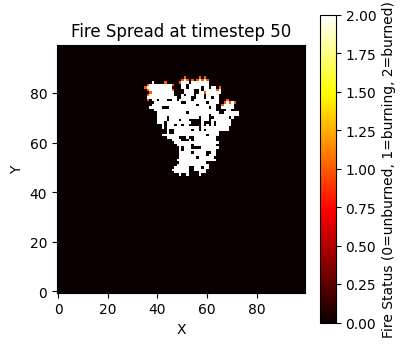

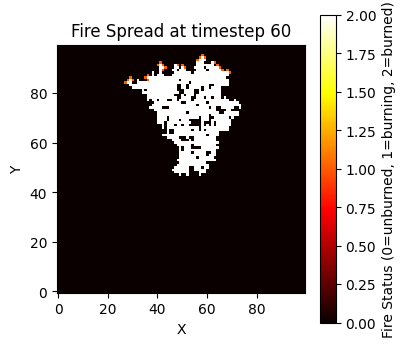

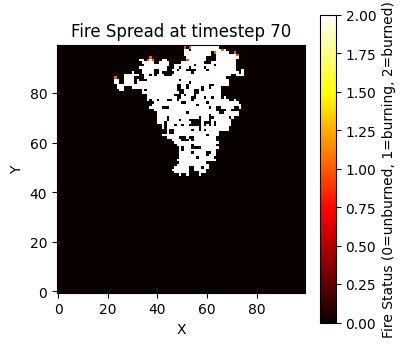

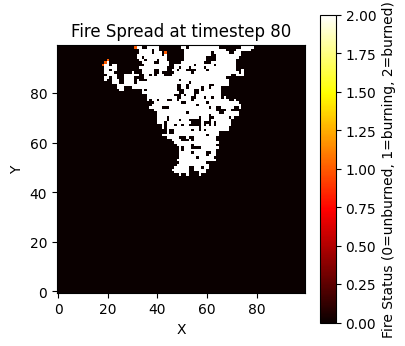

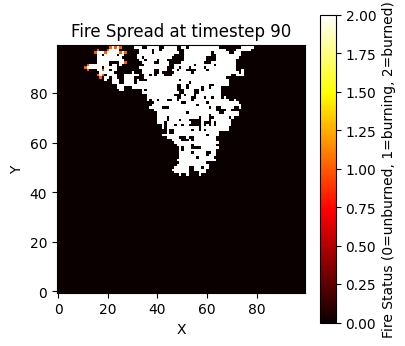

Simulation complete.


In [10]:
print("Simulation complete.")